<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Introduction

The Cook County housing market is a complex ecosystem influenced by a myriad of factors. In this project, we delve into the realm of data science to analyze and understand this market better. Our journey begins with Exploratory Data Analysis (EDA), where we unravel the structure of the housing data to uncover patterns, trends, and anomalies.

With a thorough understanding of the data, we transition into the realm of predictive modeling. Leveraging the power of linear regression, we construct a model aimed at predicting housing prices based on various features. This model serves as a foundational tool for understanding the dynamics of the Cook County housing market and aids in making informed decisions.

However, the journey doesn't end here. We meticulously analyze the errors in our model, seeking opportunities for enhancement. Through iterative refinement and feature engineering, we strive to improve the model's performance, aiming for higher accuracy and predictive power.

Join us on this data-driven exploration of the Cook County housing market, where every insight gained brings us closer to unraveling its intricate dynamics.

In [2]:
""" 
For this project, we will utilize the numpy and pandas libraries for data manipulation, 
along with Matplotlib and Seaborn for data visualization.
"""
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# The Data

The dataset consists of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset has 61 features in total. An explanation of each variable can be found in the included `CookCountyDataCodebook.txt` file .

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for this part of the project.

Let's first extract the data from the `cook_county_data.zip`. Just run the cells below: 

In [5]:
with zipfile.ZipFile('data/cook_county_data.zip') as item:
    item.extractall()

Now, let's load the training data.

In [7]:
training_data = pd.read_csv("cook_county_train_val.csv", index_col='Unnamed: 0')

As a sanity check, we should verify that the data shape matches the description.

In [8]:
# 204792 observations and 62 features in training data
assert training_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in training_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `CookCountyDataCodebook.txt` (in the same directory as this notebook). 

Let's take a quick look at all the current columns in our training data.

In [9]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Exploratory Data Analysis

This data set was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home . You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf). In the later part of this project we will be building a linear model that predict sales prices using training data but it's important to first understand how the structure of the data informs such a model. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

### Sale Price
We begin by examining the distribution of our target variable `Sale Price`. We have created a helper method `plot_distribution` that one can use to visualize the distribution of the `Sale Price` using both the histogram and the box plot at the same time.

In [10]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

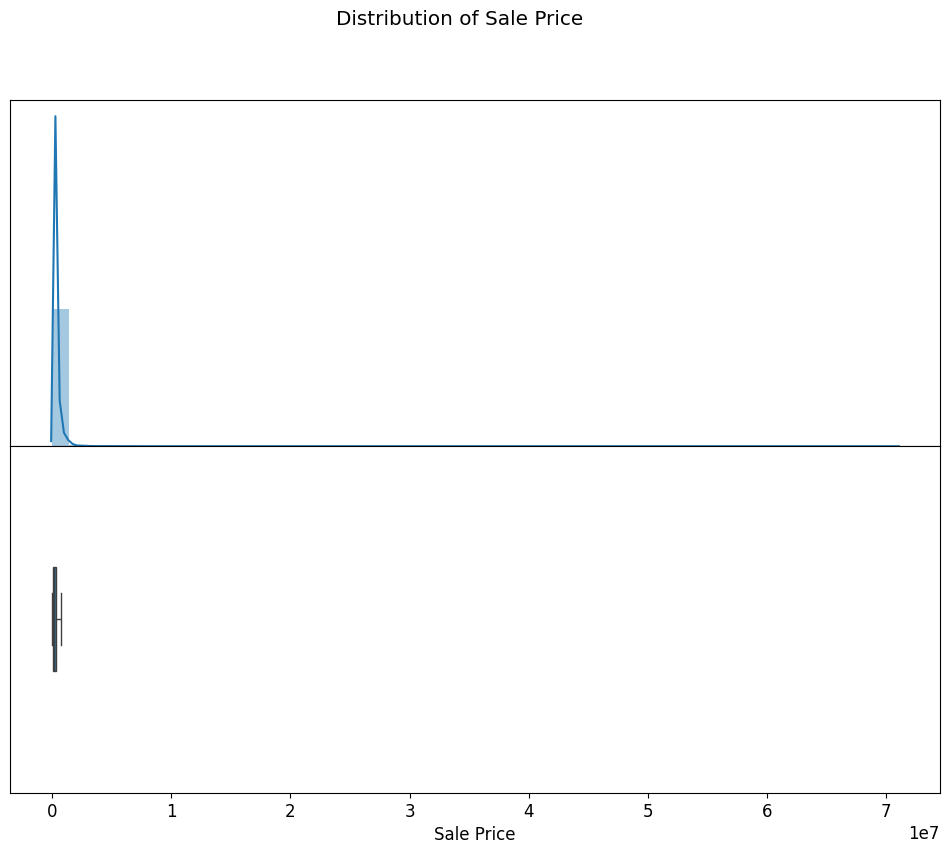

In [14]:
plot_distribution(training_data, label='Sale Price')